In [77]:
#importing data and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing #import dataset

In [101]:
housing = fetch_california_housing() #load dataset as "housing"

In [102]:
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['HousePrice'] = housing.target #specify our target variable interesting in house price
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [103]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [104]:
#check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   HousePrice  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


<AxesSubplot: >

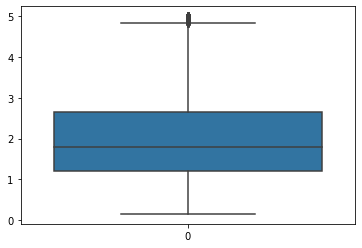

In [105]:
sns.boxplot(df['HousePrice'])

In [106]:
#we see some outliers in boxplot of house price
#create upper and lower limit on data to remove outliers
upper_limit = df['HousePrice'].quantile(0.99)
print(upper_limit)
lower_limit = df['HousePrice'].quantile(0.01)
print(lower_limit)

5.00001
0.5


In [107]:
#filter our dataset with this new upper and lower limit

df['HousePrice']= np.where(df['HousePrice'] < lower_limit, lower_limit, df['HousePrice'])
print(df.head())
#For any value of houseprice that is lower than the lower_limit, we will replace it with the lower_limit value, otherwise we will keep the orginal value of the House price
df['HousePrice']= np.where(df['HousePrice'] > upper_limit, upper_limit, df['HousePrice'])
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  HousePrice  
0    -122.23       4.526  
1    -122.22       3.585  
2    -122.24       3.521  
3    -122.25       3.413  
4    -122.25       3.422  
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4

In [108]:
#check linearlity

#import stats model and fit the OLS

import statsmodels.api as sm
X_constant = sm.add_constant(housing.data)
housing_model = sm.OLS(housing.target, housing.data).fit()
housing_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          2.137e+04
Date:                Wed, 16 Aug 2023   Prob (F-statistic):                        0.00
Time:                        18:31:44   Log-Likelihood:                         -24087.
No. Observations:               20640   AIC:                                  4.819e+04
Df Residuals:                   20632   BIC:                                  4.825e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5135      0.004    120.594      0.000       0.505       0.522
x2             0.0157      0.000     33.727      0.000       0.015       0.017
x3            -0.1825      0.006    -29.673      0.000      -0.195      -0.170
x4             0.8651      0.030     28.927      0.000       0.806       0.924
x5          7.792e-06   5.09e-06      1.530      0.126   -2.19e-06    1.78e-05
x6            -0.0047      0.001     -8.987      0.000      -0.006      -0.004
x7            -0.0639      0.004    -17.826      0.000      -0.071      -0.057
x8            -0.0164      0.001    -14.381      0.000      -0.019      -0.014
==============================================================================
Omnibus:                     4353.392   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.489
Skew:                           1.069   Prob(JB):                         0.00
Kurtosis:                       6.436   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
#create function to calculate residuals
def cal_residuals(model, features, label):
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    return df_results

In [110]:
def linear_assumptions(model, features,label):
    df_results = cal_residuals(model, features, label)
    
    #plotting
    seaplot = sns.regplot(x="Actual", y='Predicted', data = df_results, fit_reg =False, truncate=True)
    #seaplot.set(xlim=(0, 6))
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords, color = 'darkorange', linestyle= '--')
    plt.title('Actual Vs. Predicted')
    plt.show()

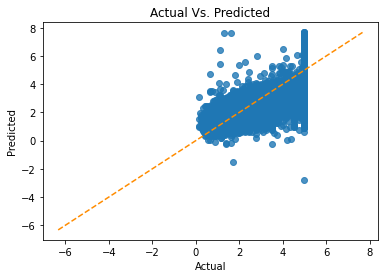

In [111]:
linear_assumptions(housing_model, housing.data, housing.target)

In [112]:
#plotting correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688026
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105803
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.152044
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046386
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024796
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023745
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144087
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045915
HousePrice,0.688026,0.105803,0.152044,-0.046386,-0.024796,-0.023745,-0.144087,-0.045915,1.000000


In [115]:
#Medlnc and HouseAge and AveRooms are the only positvely correlated values

#we can use vif (variance inflation factor) to find multicorrelated variables

from statsmodels.stats.outliers_influence import variance_inflation_factor
x = df.drop(['HousePrice'], axis = 1) #target variable is dropped from vif calculations
vif_data = pd.DataFrame()
vif_data['features'] = x.columns

#calculate vif
vif_data['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

     features         vif
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


In [116]:
#we see AveRooms, AveBedrms, Latituyde and longitude are all strongly correlated by other factors that are not realted to houseprice
#5-10 is critically correlated and should be dealt with

df1 = df.drop(['Latitude', 'AveBedrms'], axis=1)

In [117]:
x = df1.drop(['HousePrice'], axis = 1)
y = df1['HousePrice']

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import linear_model

In [129]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size =0.25)

In [130]:
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             HousePrice   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          2.022e+04
Date:                Wed, 16 Aug 2023   Prob (F-statistic):                        0.00
Time:                        18:47:53   Log-Likelihood:                         -18483.
No. Observations:               15480   AIC:                                  3.698e+04
Df Residuals:                   15474   BIC:                                  3.702e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.4459      0.004    124.359      0.000       0.439       0.453
HouseAge       0.0179      0.001     32.703      0.000       0.017       0.019
AveRooms      -0.0227      0.003     -8.389      0.000      -0.028      -0.017
Population  2.627e-05   5.92e-06      4.439      0.000    1.47e-05    3.79e-05
AveOccup      -0.0066      0.001     -6.767      0.000      -0.008      -0.005
Longitude      0.0005      0.000      1.980      0.048    4.86e-06       0.001
==============================================================================
Omnibus:                     3402.608   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8528.624
Skew:                           1.207   Prob(JB):                         0.00
Kurtosis:                       5.720   Cond. No.                     1.07e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
#fitting regression model
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [134]:
print("R Square: {}".format(r2_score(y_train, y_pred_train)))
print("MAE: {}".format(mean_absolute_error(y_train, y_pred_train)))
print("RMSE: {}".format(np.sqrt(mean_absolute_error(y_train, y_pred_train))))

R Square: 0.5218096289013132
MAE: 0.5947077504916402
RMSE: 0.7711729705400988


In [ ]:
#note, this dataset has very few features
#R-Square of 0.5 indicates varaince in y is not explained by our x values